<a href="https://colab.research.google.com/github/niked0/mvpimdfinal/blob/main/MVPML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução - Dataset NBA

Como um entusiasta e amante do esporte, ao escolher este dataset para a analise exploratória e pré-processamento, fiquei com curiosidades que me instigavam e acredito que a muitas das pessoas que assistem dividem também essa paixão.
Por isso, com as informações que estão presentes no dataset, sendo elas:

*   rk: Rank (classificação)
*   player: Nome do jogador
*   pos: Posição do jogador
*   age: Idade do jogador
*   tm: Time (equipe)
*   g: Partidas jogadas (games)
*   gs: Partidas iniciadas como titular (games started)
*   mp: Minutos jogados (minutes played)
*   fg: Cestas convertidas (field goals made)
*   fga: Tentativas de cesta (field goals attempted)
*   fg_2: Percentual de acerto de cestas de campo (field goal percentage)
*   3p: Cestas de 3 pontos convertidas (3-point field goals made)
*   3pa: Tentativas de cesta de 3 pontos (3-point field goals attempted)
*   3p_2: Percentual de acerto de cestas de 3 pontos (3-point field goal percentage)
*   2p: Cestas de 2 pontos convertidas (2-point field goals made)
*   2pa: Tentativas de cesta de 2 pontos (2-point field goals attempted)
*   2p_2: Percentual de acerto de cestas de 2 pontos (2-point field goal percentage)
*   efg: Percentual de acerto de cestas ajustado (effective field goal percentage)
*   ft: Lances livres convertidos (free throws made)
*   fta: Tentativas de lance livre (free throws attempted)
*   ft_2: Percentual de acerto de lances livres (free throw percentage)
*   orb: Rebotes ofensivos (offensive rebounds)
*   drb: Rebotes defensivos (defensive rebounds)
*   trb: Total de rebotes (total rebounds) ast: Assistências (assists)
*   stl: Roubadas de bola (steals)  
*   blk: Tocos (blocks)
*   tov: Perdas de bola (turnovers)
*   pf: Faltas pessoais (personal fouls)
*   pts: Pontos (points)
*   year: Ano
*   MVP: Foi o jogador mais valioso da temporada?

Podemos extrair dúvidas e análises sob o dataset;

1.   Qual a distribuição de jogadores que receberam o prêmio de MVP entre os times da NBA?
1.   Quais são os principais critérios levados em consideração ao escolher um jogador MVP?
3.   Os jogadores MVPs estão quanto acima dos outros jogadores de cada temporada?

Com isso, acredito que também seja possível utilizar metodologias de Machine Learning para predizer quais são os prováveis grupos de melhores jogadores nas próximas temporadas e que serão competidores entre o prêmio de MVP.

---




In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


#Importando bibliotecas necessárias



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
import missingno as ms
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix


url_dados = 'https://raw.githubusercontent.com/niked0/mvpnba/main/NBA_Player_Statsm_mvp.csv'

nba = pd.read_csv(url_dados)

# Separar apenas status importantes para análises
status_nba = nba.loc[:, ['Age', 'FG', '3P', '2P', 'AST', 'TOV', 'PTS', 'MVP']]

# Contagem de MVPs por jogador
mvp_players = nba[nba['MVP']]

# Separar os jogadores que receberam o MVP dos que não receberam
non_mvp_players = status_nba[~status_nba['MVP']]

# Contagem de MVPs por time
mvp_counts = mvp_players['Tm'].value_counts()

# Converter a coluna 'Season' para representar o início do ano da temporada
nba['Year_Start'] = nba['Season'].apply(lambda x: int(x.split('-')[0]))
status_nba['Year_Start'] = nba['Season'].apply(lambda x: int(x.split('-')[0]))



Para a análise, são necessários separar alguns dataframes e utilizar algumas funções para checar a integridade e o corpo do dataset e importar algumas bibliotecas que serão utilizadas no processo.

#2. Verificação do dataset

In [ ]:
# Verificando que nba é um dataframe
type(nba)

pandas.core.frame.DataFrame

In [ ]:
#Verificando primeiras linhas
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP,Year_Start
0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,8.8,...,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-98,False,1997
1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,6.1,...,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-98,False,1997
2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,16.4,...,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-98,False,1997
3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,6.7,...,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-98,False,1997
4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,3.9,...,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-98,False,1997


In [ ]:
# exibindo as últimas linhas
nba.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Season,MVP,Year_Start
14568,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2021-22,False,2021
14569,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2021-22,False,2021
14570,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2021-22,False,2021
14571,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2021-22,False,2021
14572,605,Ivica Zubac,C,24,LAC,76,76,24.4,4.1,6.5,...,8.5,1.6,0.5,1.0,1.5,2.7,10.3,2021-22,False,2021


In [ ]:
# exibindo os nomes das colunas
nba.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Season',
       'MVP', 'Year_Start'],
      dtype='object')

In [ ]:
# exibindo as dimensões do dataset
nba.shape

(14573, 33)

In [ ]:
# exibindo a quantidade de linhas por coluna
nba.count()

Rk            14573
Player        14573
Pos           14573
Age           14573
Tm            14573
G             14573
GS            14573
MP            14573
FG            14573
FGA           14573
FG%           14485
3P            14573
3PA           14573
3P%           12375
2P            14573
2PA           14573
2P%           14419
eFG%          14485
FT            14573
FTA           14573
FT%           13824
ORB           14573
DRB           14573
TRB           14573
AST           14573
STL           14573
BLK           14573
TOV           14573
PF            14573
PTS           14573
Season        14573
MVP           14573
Year_Start    14573
dtype: int64

In [ ]:
# exibindo um sumário estatístico
nba.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year_Start
count,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14485.000000,14573.000000,14573.000000,...,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000,14573.000000
mean,244.332876,26.705483,45.544500,21.565429,19.623626,2.932046,6.598586,0.432377,0.590894,1.703637,...,0.909984,2.522013,3.429953,1.758114,0.621540,0.390167,1.132368,1.781740,7.853057,2009.765045
std,139.596859,4.252495,26.110389,27.035594,9.957188,2.133970,4.541544,0.104592,0.698191,1.840081,...,0.804527,1.766841,2.433847,1.761888,0.439759,0.460479,0.787383,0.826657,5.840447,7.279212
min,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.000000
25%,124.000000,23.000000,22.000000,0.000000,11.400000,1.300000,3.100000,0.393000,0.000000,0.100000,...,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.600000,1.200000,3.400000,2004.000000
50%,243.000000,26.000000,48.000000,7.000000,18.900000,2.400000,5.500000,0.435000,0.300000,1.100000,...,0.700000,2.200000,2.900000,1.200000,0.500000,0.200000,1.000000,1.800000,6.400000,2010.000000
75%,361.000000,30.000000,70.000000,39.000000,27.700000,4.100000,9.200000,0.479000,1.000000,2.800000,...,1.300000,3.300000,4.600000,2.300000,0.900000,0.500000,1.500000,2.400000,11.100000,2016.000000
max,605.000000,44.000000,85.000000,83.000000,43.700000,12.200000,27.800000,1.000000,5.300000,13.200000,...,6.800000,12.000000,18.000000,12.800000,3.000000,6.000000,5.700000,6.000000,36.100000,2021.000000


Dadas as informações do dataset e dos dataframes retirados, podemos começar as análises gráficas sem nenhum problema previamente encotrado.

#3. Análise exploratoria

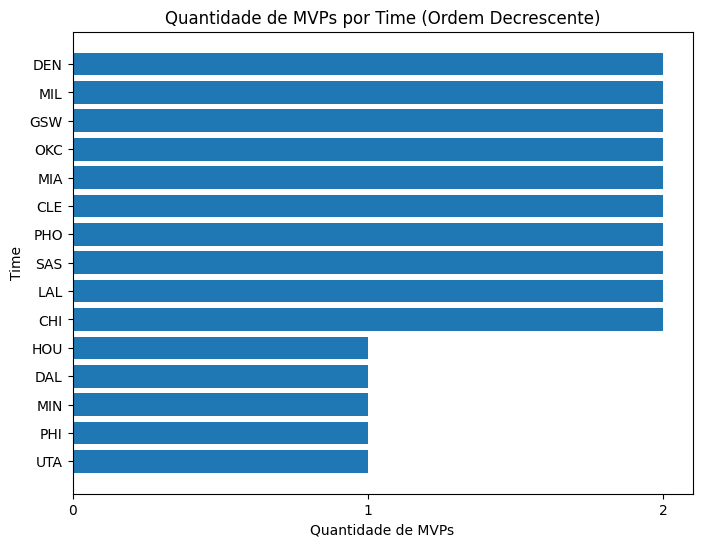

In [ ]:
# Ordenando os valores em ordem decrescente
mvp_counts = mvp_counts.sort_values(ascending=True)

# Plotando um gráfico de barras horizontais para visualizar a contagem de MVPs por time
plt.figure(figsize=(8, 6))
plt.barh(mvp_counts.index, mvp_counts.values)
plt.xlabel('Quantidade de MVPs')
plt.ylabel('Time')
plt.title('Quantidade de MVPs por Time (Ordem Decrescente)')

# Definindo o intervalo e os valores inteiros para o eixo x
plt.xticks(np.arange(0, mvp_counts.max() + 1, step=1))

plt.show()




Agora é possível responder a primeira pergunta feita, existe uma grande distribuição dos MVPS entre os times dado o periodo do dataset, parece não haver nenhum time destaque para com os MVPs.

<Axes: >

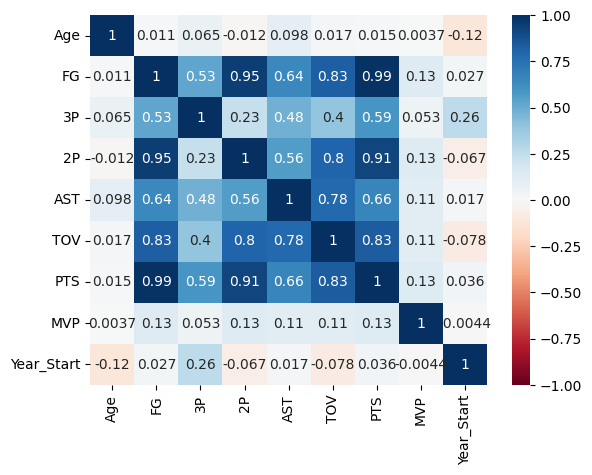

In [ ]:
#Plotando heatmap

sns.heatmap(status_nba.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)


Através das informações entregues pelo heatmap, a correlação entre os campos que se mostram mais importantes para a coluna MVP são: pontos, 2 pontos, FG(cestas convertidas), assistencias e turnovers.
Seguirei então com as análises em cima das estatisticas de pontos, turnovers e assistencias. Dado que o número dos 2 pontos e o FG estão altamente correlacionados aos pontos.

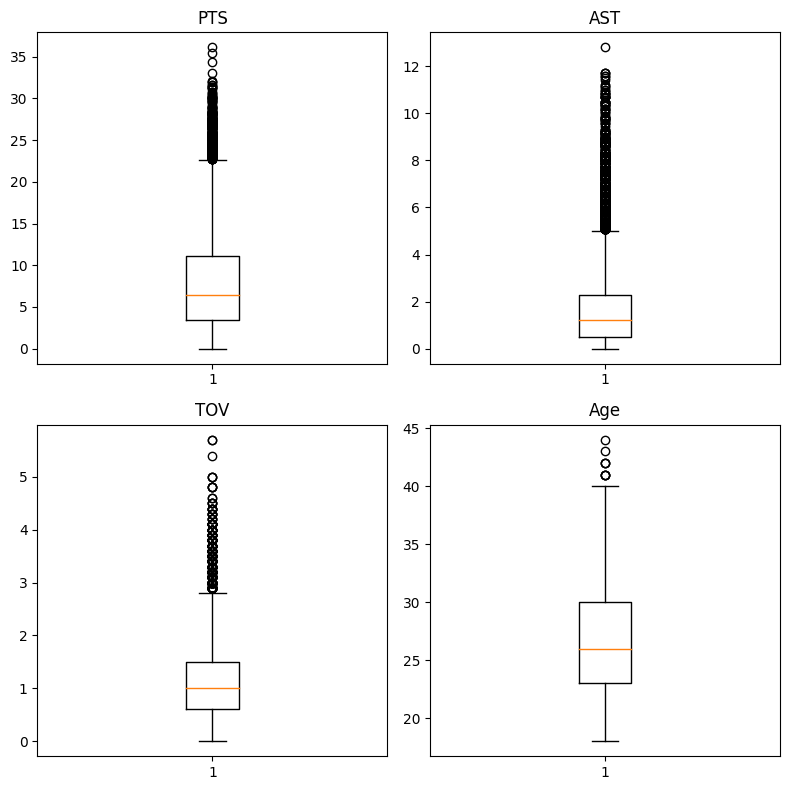

In [ ]:

#Separando espaço necessário e dimensões

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# subplot1: PTS
ax[0, 0].boxplot(status_nba['PTS'])
ax[0, 0].set_title("PTS")

# subplot2: AST
ax[0, 1].boxplot(status_nba['AST'])
ax[0, 1].set_title("AST")

# subplot3: TOV
ax[1, 0].boxplot(status_nba['TOV'])
ax[1, 0].set_title("TOV")

# subplot4: AGE
ax[1, 1].boxplot(status_nba['Age'])
ax[1, 1].set_title("Age")

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()  # Exibe os subplots


A vias de curiosidade também podemos observar a distribuição de idade dos jogadores, tendo poucos acima dos quartis.

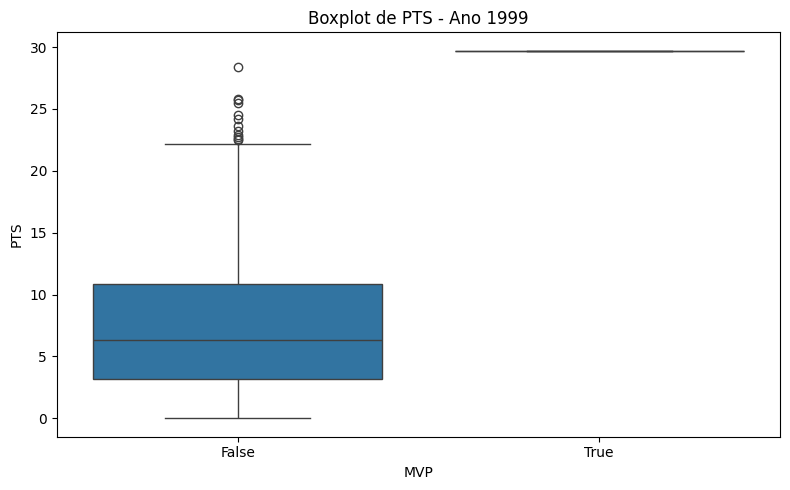

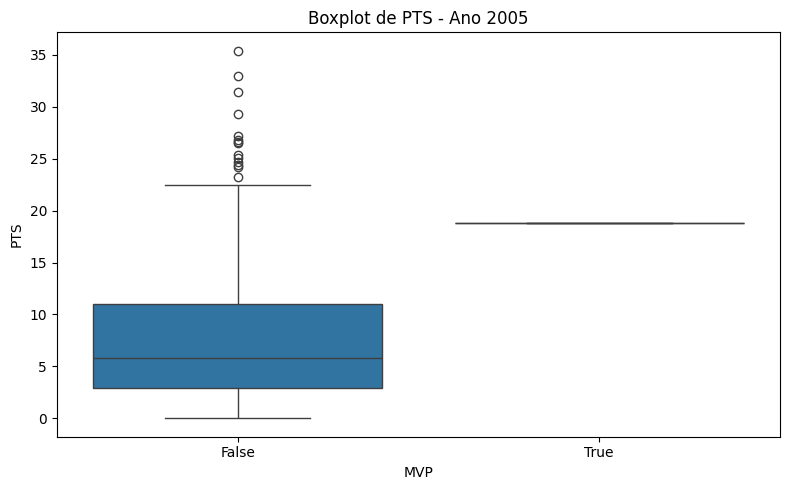

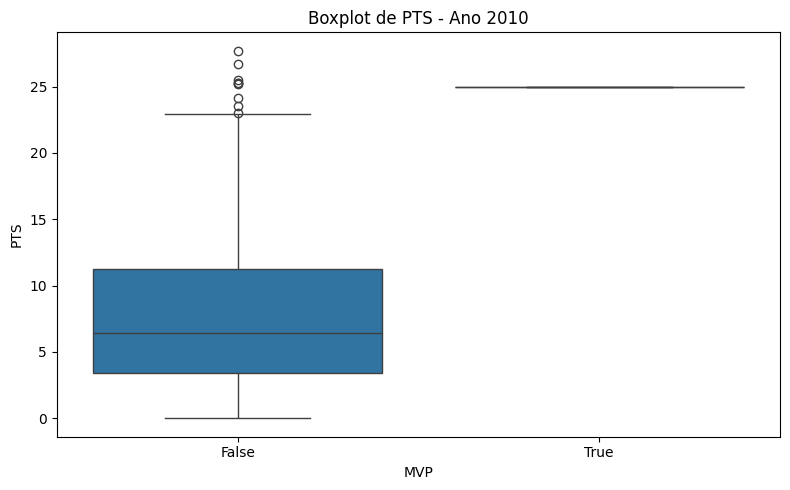

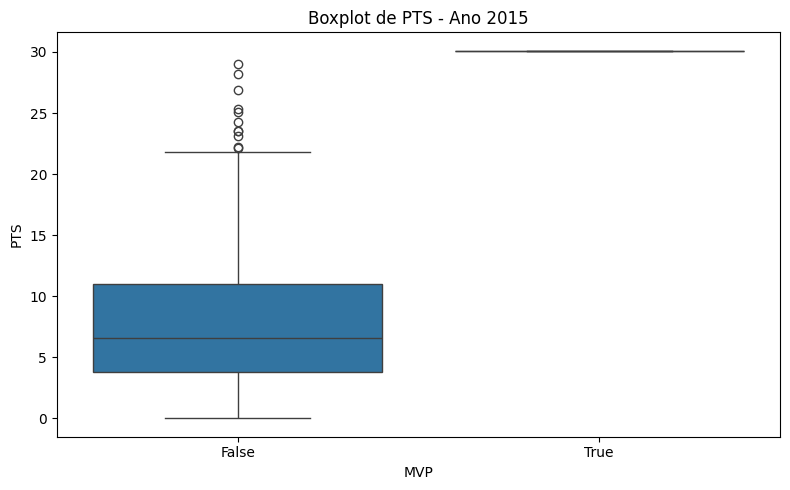

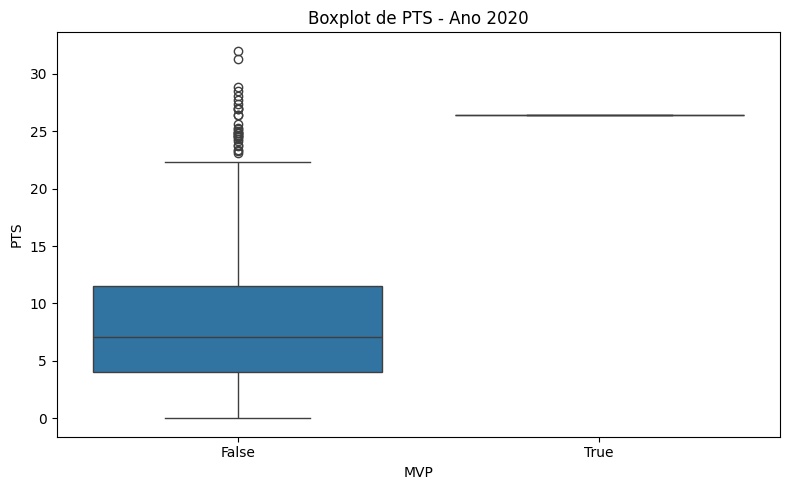

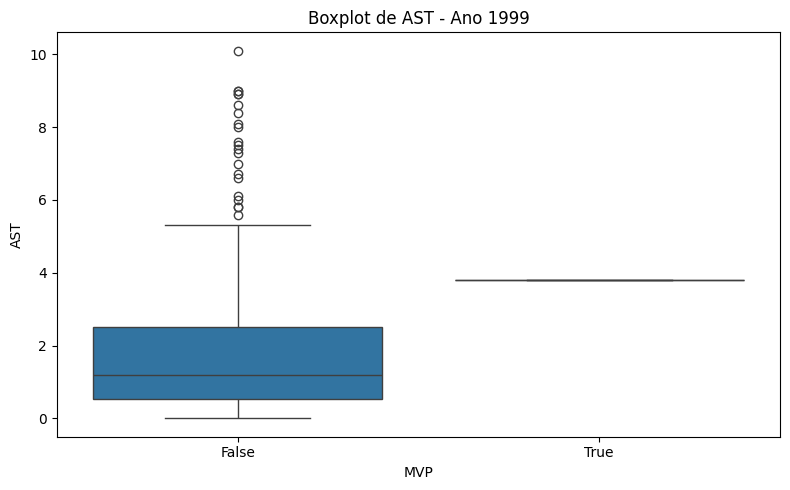

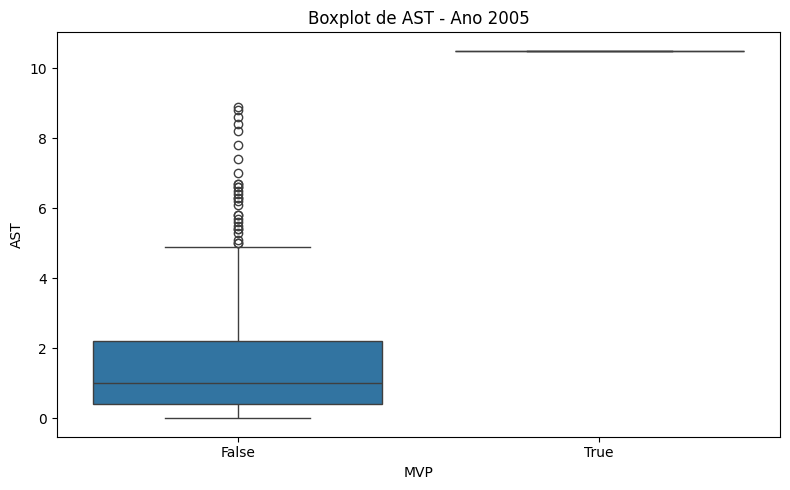

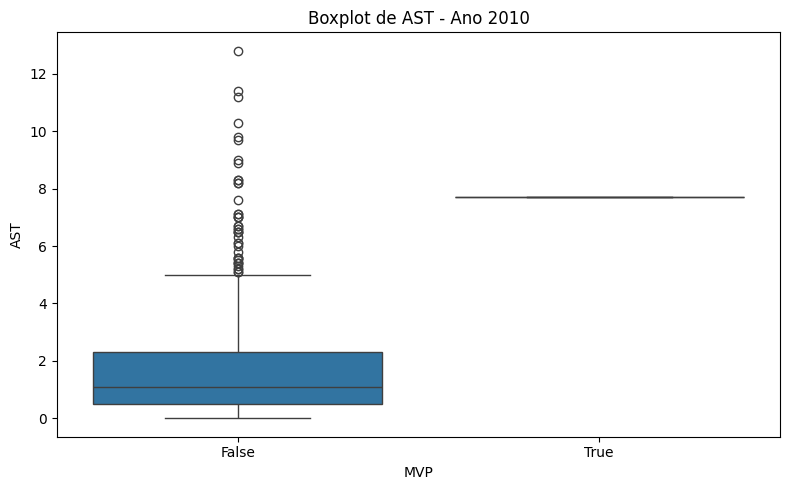

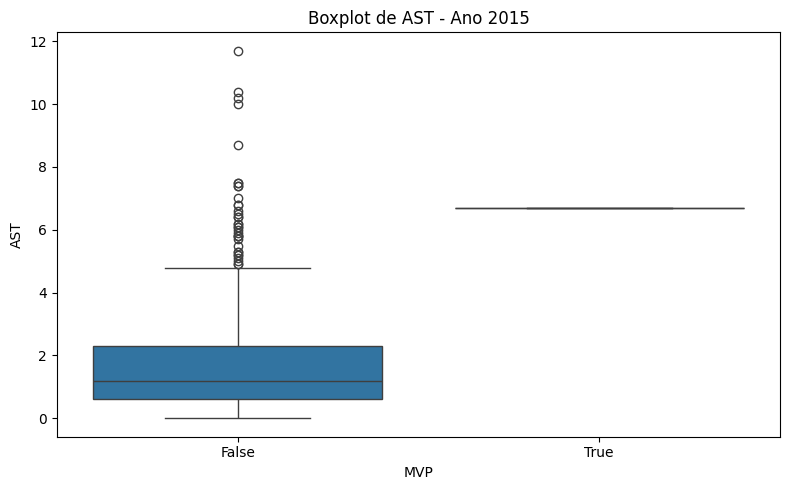

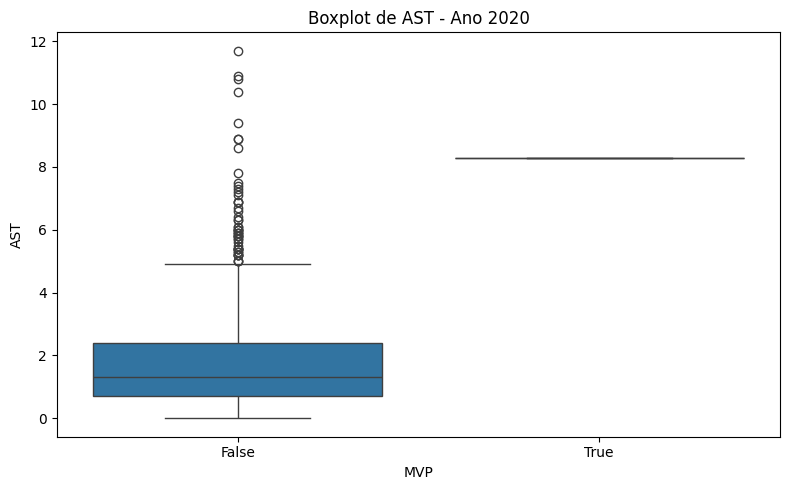

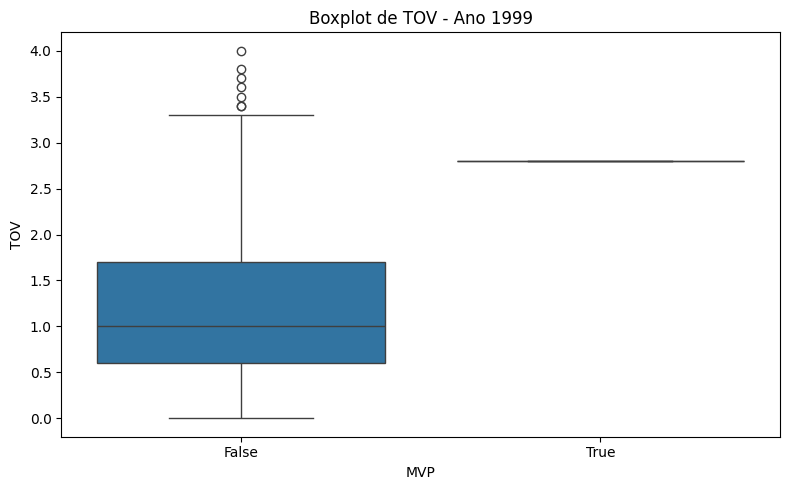

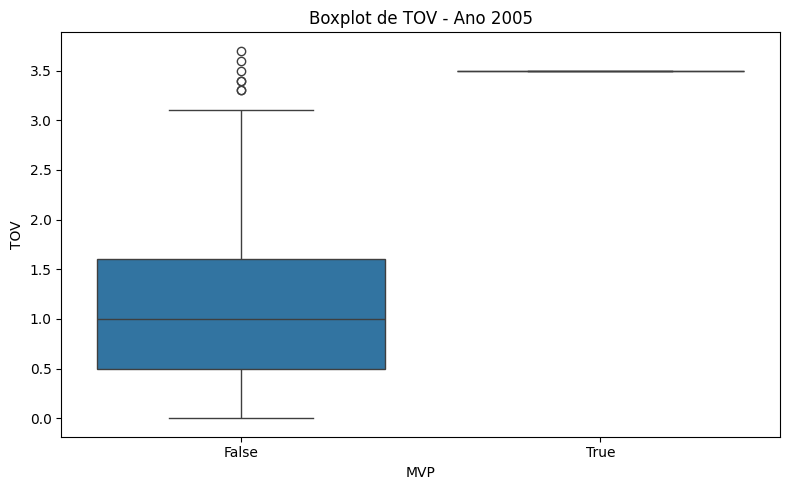

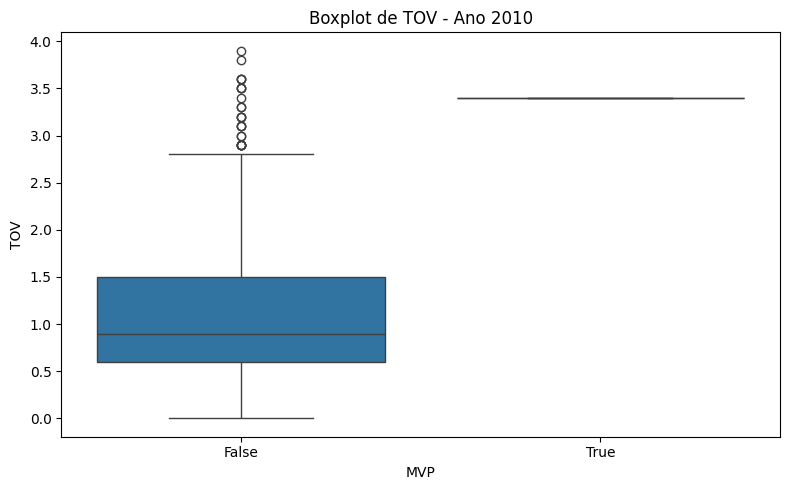

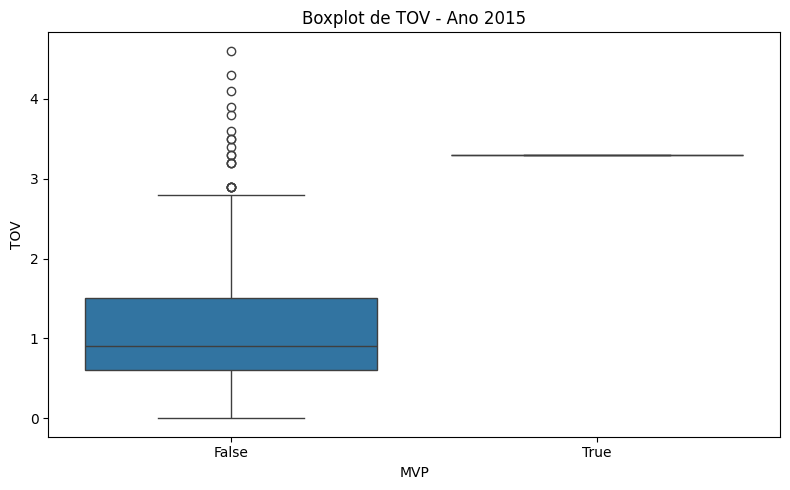

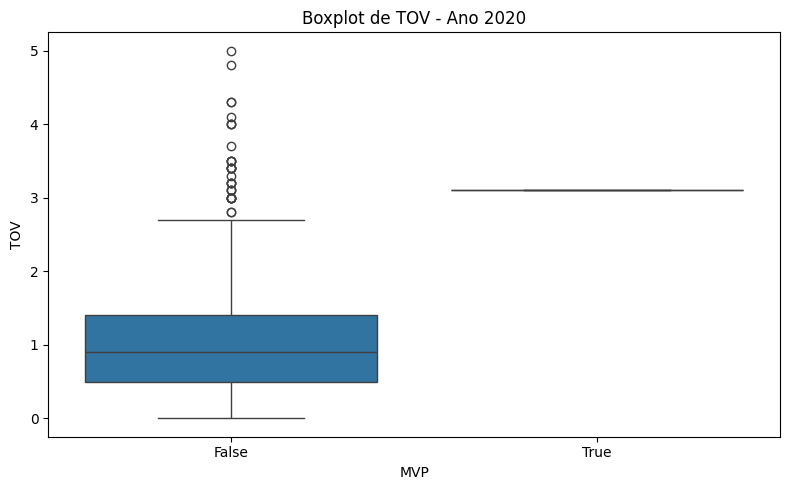

In [ ]:


# Anos específicos para comparar
anos_especificos = [1999, 2005, 2010, 2015, 2020]

for estatistica in ['PTS', 'AST', 'TOV']:
    for ano in anos_especificos:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='MVP', y=estatistica, data=status_nba[status_nba['Year_Start'] == ano])
        plt.title(f'Boxplot de {estatistica} - Ano {ano}')
        plt.xlabel('MVP')
        plt.ylabel(f'{estatistica}')
        plt.tight_layout()
        plt.show()


Os boxplots com informações dos jogadores, nos mostraram as medianas e a concentração das estatisticas dos jogadores da nba versus a média do jogador MVP no ano indicado, e em todos os anos, os jogadores MVPs se mostraram muito acima.
Até mesmo a estatisca de turnover, sendo possivel concluir que, apesar de ser uma estatistica "ruim", não é levada como um ponto negativo caso o jogador seja efetivo ao pontuar e dar assistencias para o time.

<Axes: xlabel='AST', ylabel='PTS'>

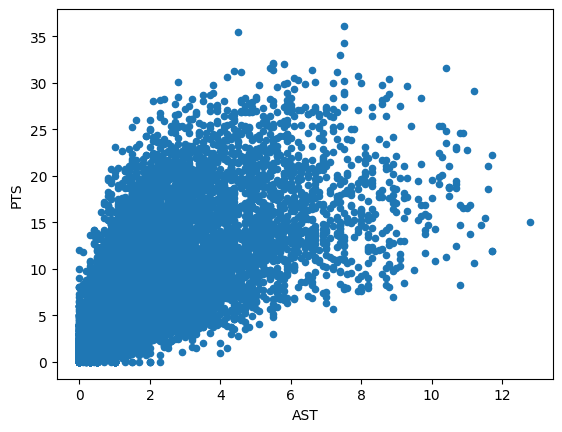

In [ ]:
# Dimensionando scatter plot
status_nba.plot(kind='scatter',
                x='AST',
                y='PTS')


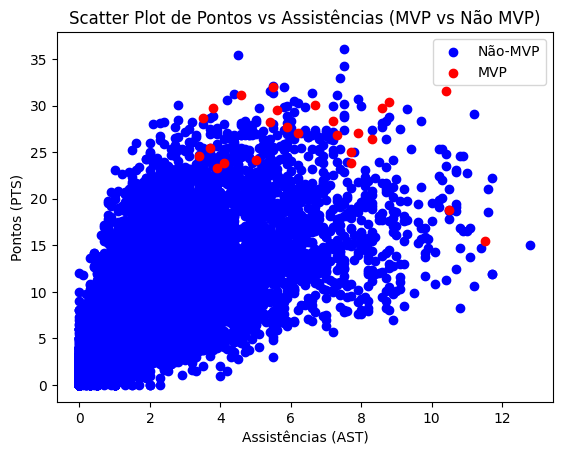

In [ ]:
# Plotar o scatter plot para os jogadores que não receberam o MVP (em azul)
plt.scatter(non_mvp_players['AST'], non_mvp_players['PTS'], color='blue', label='Não-MVP')

# Plotar o scatter plot para os jogadores que receberam o MVP (em vermelho)
plt.scatter(mvp_players['AST'], mvp_players['PTS'], color='red', label='MVP')

# Adicionar rótulos e título ao gráfico
plt.xlabel('Assistências (AST)')
plt.ylabel('Pontos (PTS)')
plt.title('Scatter Plot de Pontos vs Assistências (MVP vs Não MVP)')
plt.legend()


plt.show()


Novamente, é possível observar que o coeficiente de pontos e assistencias dos jogadores MVPs é muito acima da média, mesmo em um quadro mais geral em relação a temporada(dessa vez todas).


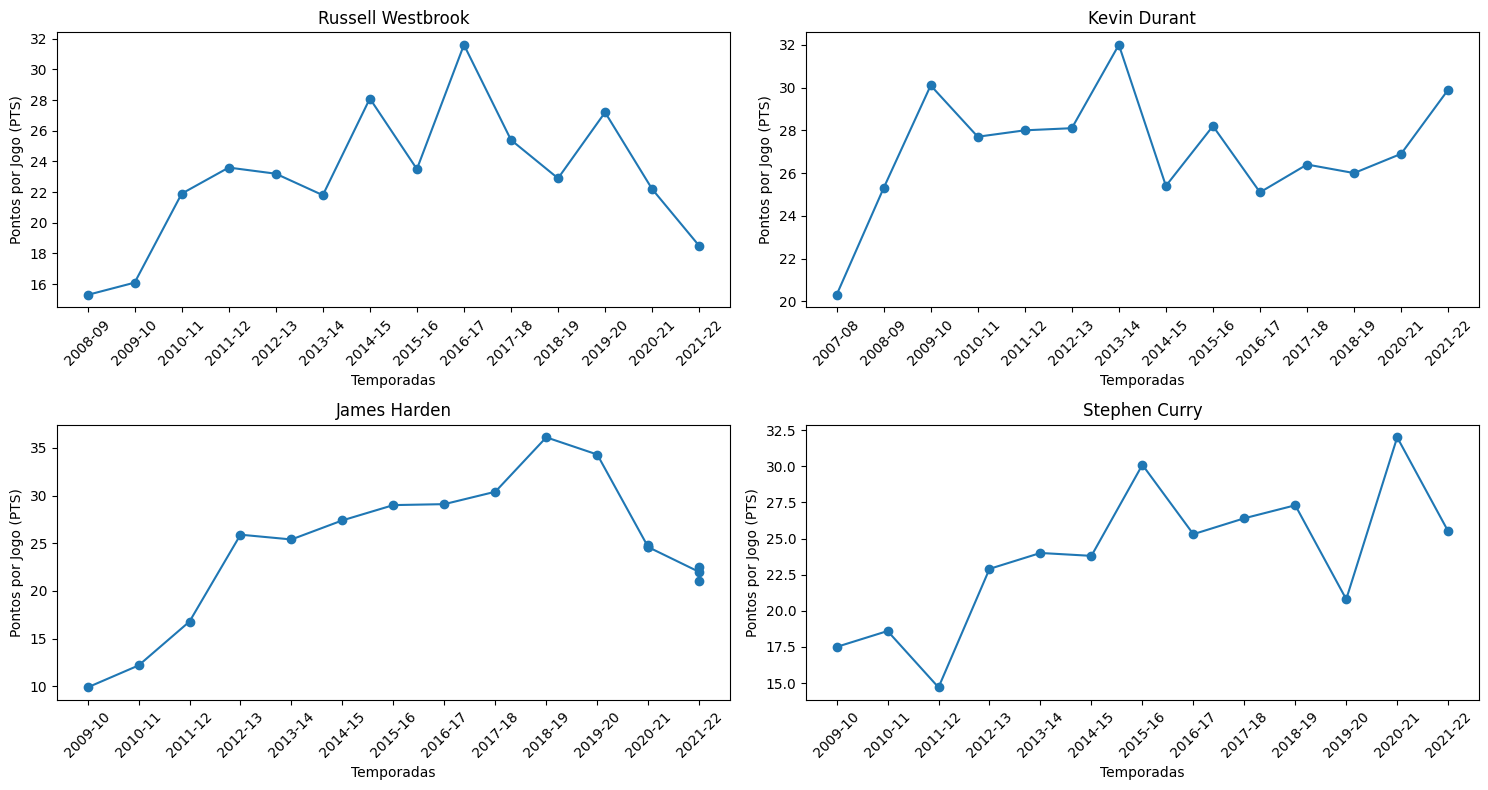

In [ ]:
# Quatro jogadores específicos que receberam o premio de MVP
jogadores = ['Russell Westbrook', 'Kevin Durant', 'James Harden', 'Stephen Curry']

# Filtrando o DataFrame para obter dados específicos desses jogadores
dados_jogadores = nba[nba['Player'].isin(jogadores)]

# Criando subplots para os gráficos individuais de cada jogador
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

for i, jogador in enumerate(jogadores):
    linha = i // 2
    coluna = i % 2
    dados_jogador = dados_jogadores[dados_jogadores['Player'] == jogador]
    axs[linha, coluna].plot(dados_jogador['Season'], dados_jogador['PTS'], marker='o')
    axs[linha, coluna].set_title(jogador)
    axs[linha, coluna].set_xlabel('Temporadas')
    axs[linha, coluna].set_ylabel('Pontos por Jogo (PTS)')
    axs[linha, coluna].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


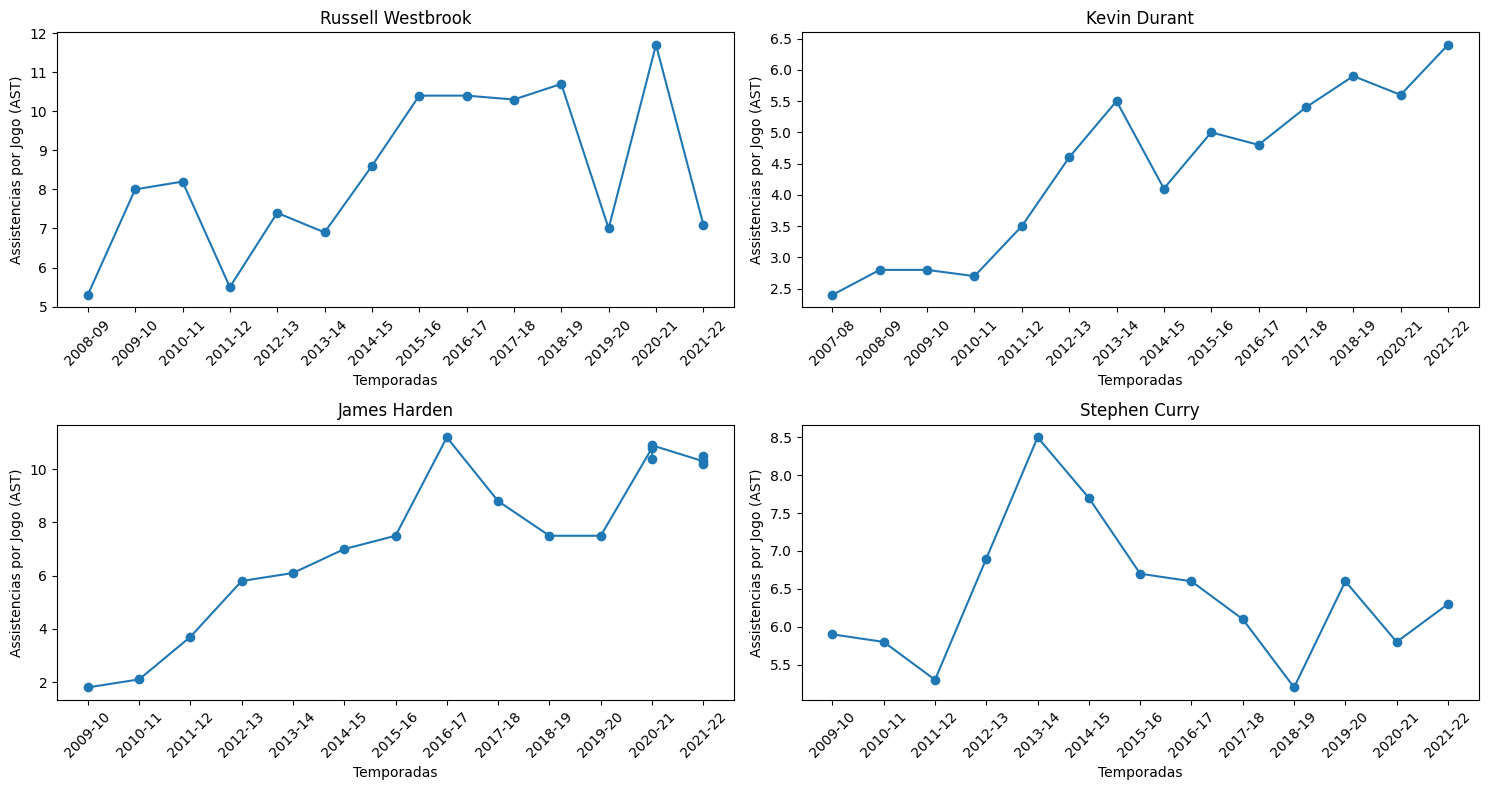

In [ ]:
# Criando subplots para os gráficos individuais de assistencias de cada jogador
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

for i, jogador in enumerate(jogadores):
    linha = i // 2
    coluna = i % 2
    dados_jogador = dados_jogadores[dados_jogadores['Player'] == jogador]
    axs[linha, coluna].plot(dados_jogador['Season'], dados_jogador['AST'], marker='o')
    axs[linha, coluna].set_title(jogador)
    axs[linha, coluna].set_xlabel('Temporadas')
    axs[linha, coluna].set_ylabel('Assistencias por Jogo (AST)')
    axs[linha, coluna].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Com o gráfico de linhas através das temporadas em que os jogadores dos quais já foram MVPs, conseguimos observar suas trajetorias e evolução, confirmando que existem informações suficientes no dataset para encontrar certos padrões de crescimento.

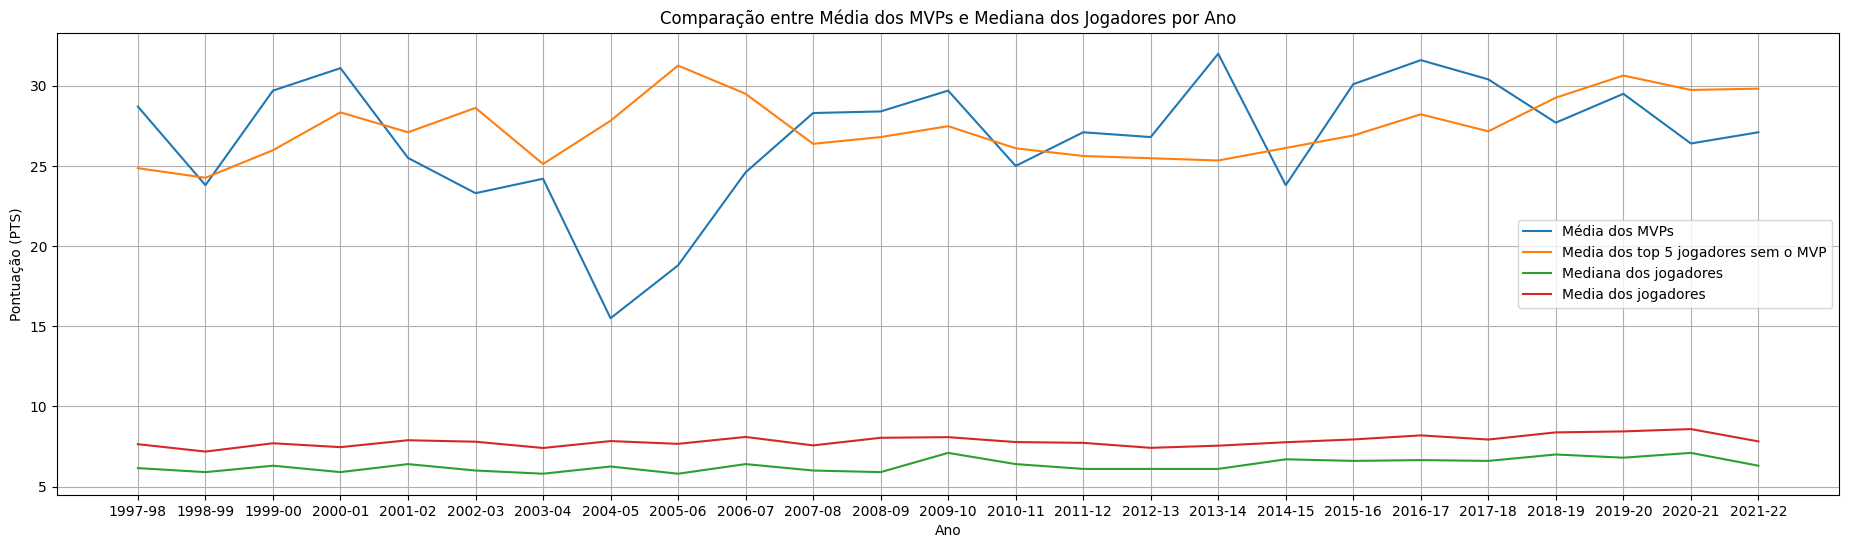

In [ ]:
# Calculando a média dos MVPs por ano
mvp_means = nba[nba['MVP'] == True].groupby('Season')['PTS'].mean()

# Calculando a mediana dos jogadores por ano
player_medians = nba.groupby('Season')['PTS'].median()

# Calculando a mediana dos jogadores por ano
player_means = nba.groupby('Season')['PTS'].mean()

# Filtrando os jogadores que não são MVP e pega os top 5 por pontos (PTS)
non_mvp_players = nba[nba['MVP'] == False]
top_players = non_mvp_players.groupby('Season').apply(lambda x: x.nlargest(5, 'PTS')).reset_index(drop=True)

# Calcula a média dos top 5 jogadores por pontos
mean_top_players = top_players.groupby('Season')['PTS'].mean()

# Criando um DataFrame com as médias dos MVPs e as medianas dos jogadores
summary_data = pd.DataFrame({'MVP_Mean': mvp_means, 'Player_Median': player_medians, 'Player_Mean' : player_means, 'Top_Players' : mean_top_players})

# Plotando o gráfico de linhas
plt.figure(figsize=(23, 6))
plt.plot(summary_data.index, summary_data['MVP_Mean'], label='Média dos MVPs')
plt.plot(summary_data.index, summary_data['Top_Players'], label='Media dos top 5 jogadores sem o MVP')
plt.plot(summary_data.index, summary_data['Player_Median'], label='Mediana dos jogadores')
plt.plot(summary_data.index, summary_data['Player_Mean'], label='Media dos jogadores')

plt.xlabel('Ano')
plt.ylabel('Pontuação (PTS)')
plt.title('Comparação entre Média dos MVPs e Mediana dos Jogadores por Ano')
plt.legend()
plt.grid(True)
plt.show()


Também existem informações o suficiente para compararmos os MVPs de cada temporada com os cinco melhores jogadores e todos os jogadores por temporada.

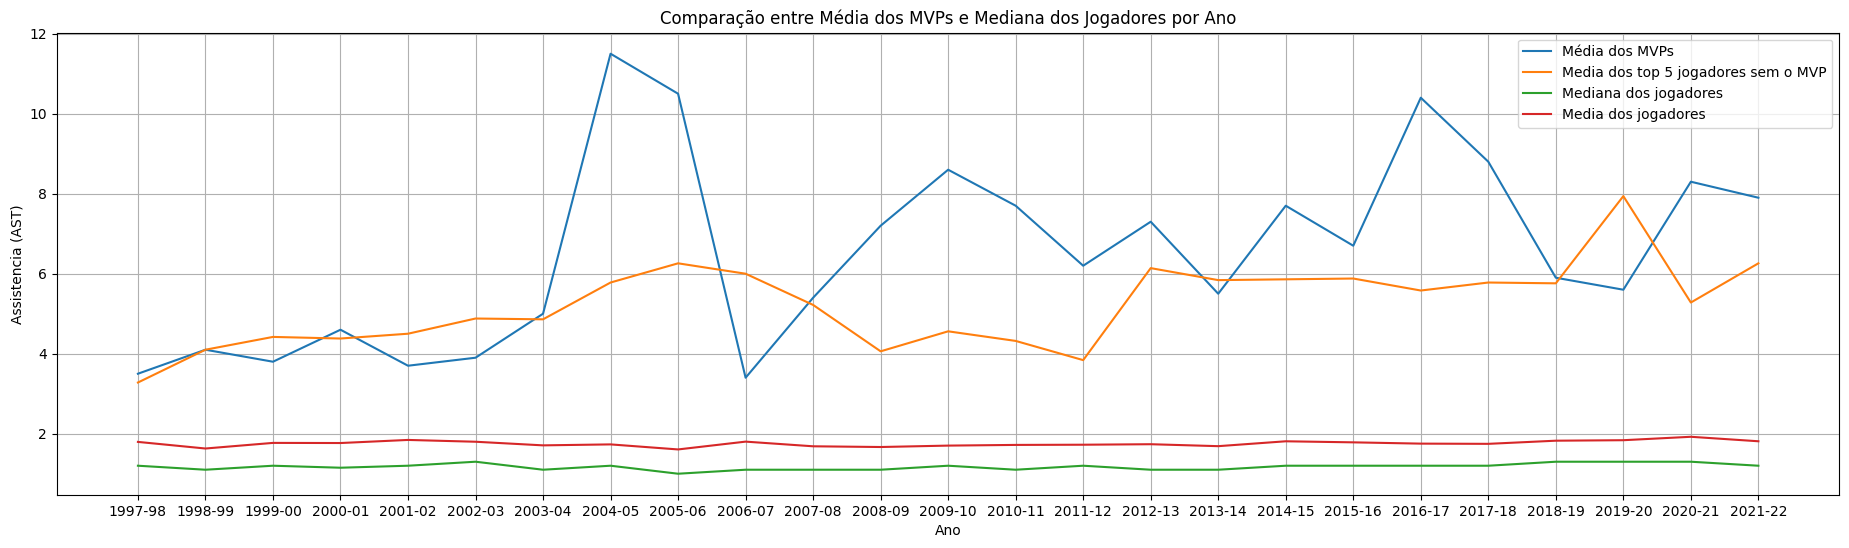

In [ ]:
# Calculando a média dos MVPs por ano
mvp_means_ast = nba[nba['MVP'] == True].groupby('Season')['AST'].mean()

# Calculando a mediana dos jogadores por ano
player_medians_ast = nba.groupby('Season')['AST'].median()

# Calculando a mediana dos jogadores por ano
player_means_ast = nba.groupby('Season')['AST'].mean()

# Filtrando os jogadores que não são MVP e pega os top 5 por assistencia (AST)
top_players_ast = non_mvp_players.groupby('Season').apply(lambda x: x.nlargest(5, 'AST')).reset_index(drop=True)

# Calculando a média dos top 5 jogadores por pontos
mean_top_players_ast = top_players.groupby('Season')['AST'].mean()

# Criando um DataFrame com as médias dos MVPs e as medianas dos jogadores
summary_data = pd.DataFrame({'MVP_Mean_AST': mvp_means_ast, 'Player_Median_AST': player_medians_ast, 'Player_Mean_AST' : player_means_ast, 'Top_Players_AST' : mean_top_players_ast})

# Plotando o gráfico de linhas
plt.figure(figsize=(23, 6))
plt.plot(summary_data.index, summary_data['MVP_Mean_AST'], label='Média dos MVPs')
plt.plot(summary_data.index, summary_data['Top_Players_AST'], label='Media dos top 5 jogadores sem o MVP')
plt.plot(summary_data.index, summary_data['Player_Median_AST'], label='Mediana dos jogadores')
plt.plot(summary_data.index, summary_data['Player_Mean_AST'], label='Media dos jogadores')

plt.xlabel('Ano')
plt.ylabel('Assistencia (AST)')
plt.title('Comparação entre Média dos MVPs e Mediana dos Jogadores por Ano')
plt.legend()
plt.grid(True)
plt.show()


Com isso, acredito que seja possivel concluir que o dataset tenha informações suficientes e é possível prosseguir para o pré-processamento.

#4. Pré-processamento do dataset



In [ ]:
# Verificando integridade das linhas
nba.isnull().sum()

Rk               0
Player           0
Pos              0
Age              0
Tm               0
G                0
GS               0
MP               0
FG               0
FGA              0
FG%             88
3P               0
3PA              0
3P%           2198
2P               0
2PA              0
2P%            154
eFG%            88
FT               0
FTA              0
FT%            749
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Season           0
MVP              0
Year_Start       0
dtype: int64

Alguns nulls encontrados.

<Axes: >

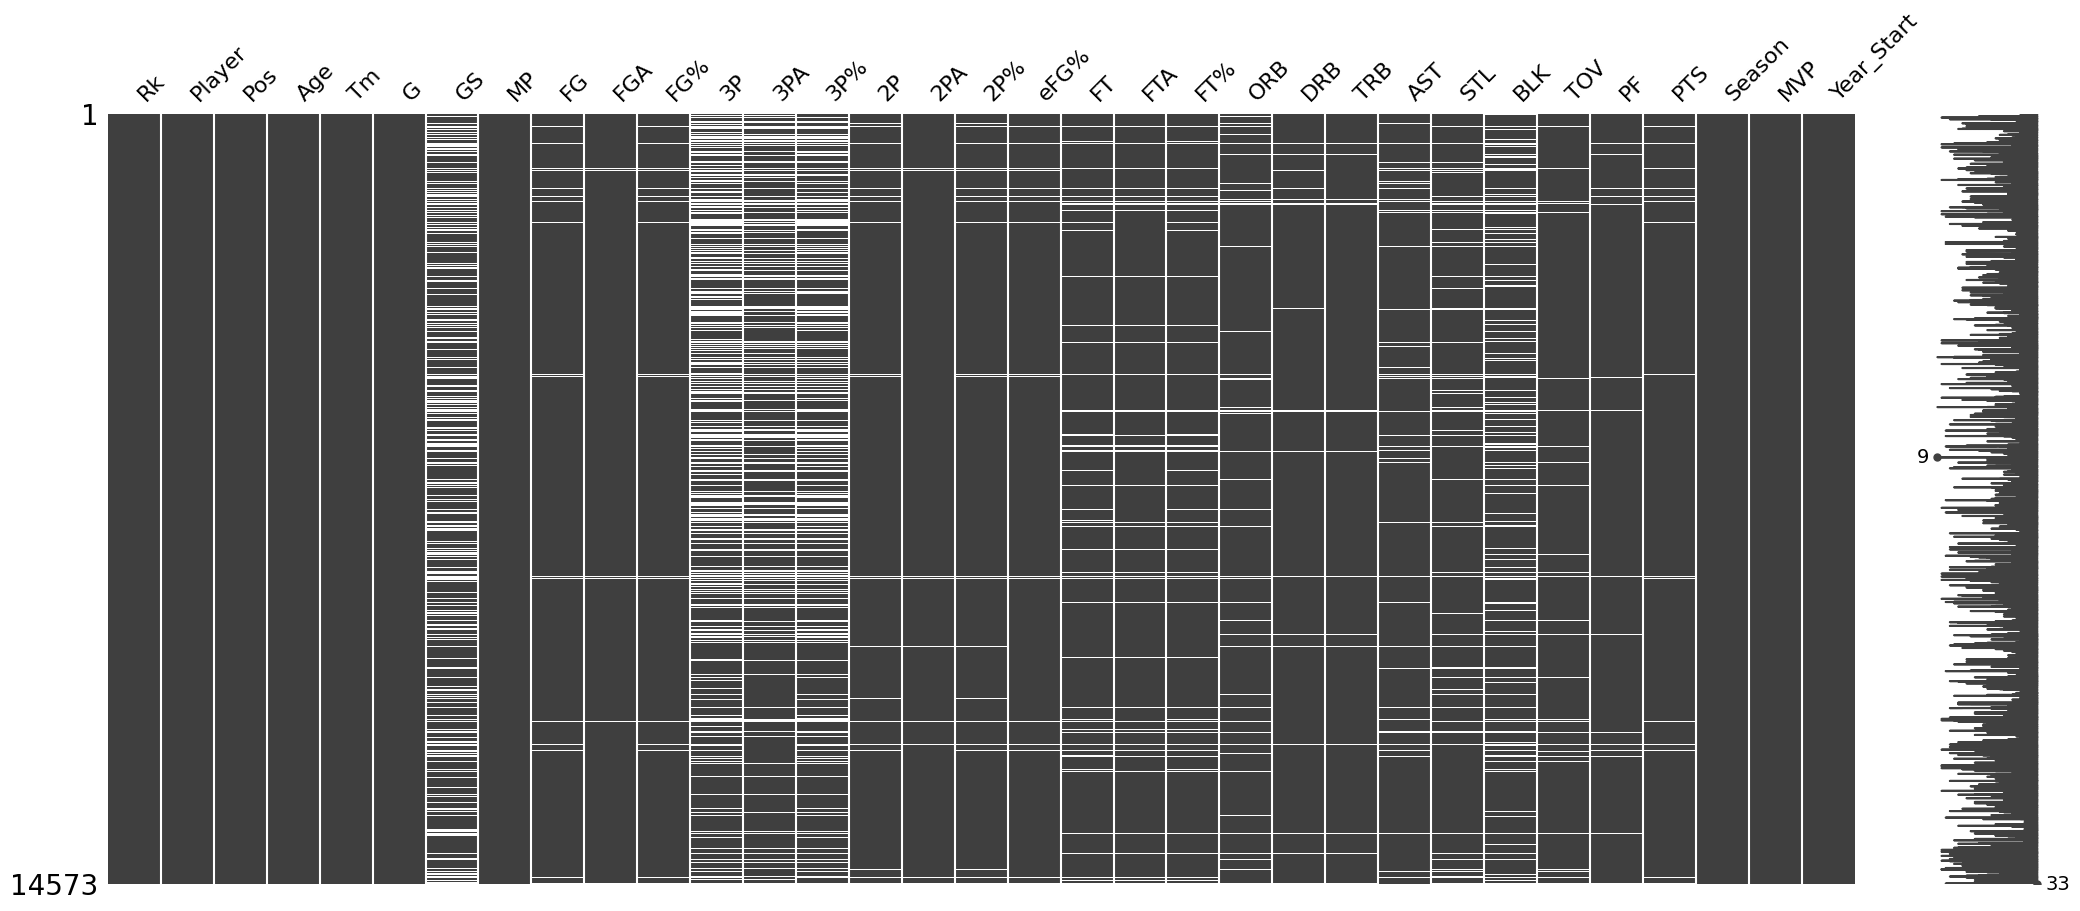

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(nba.columns)

# o novo dataset irá conter todas as colunas do dataset original
nbaSemMissings = nba[col[:]]

# substituindo os zeros por NaN
nbaSemMissings.replace(0, np.nan, inplace=True)

#Adicionando "player"
if 'Player' in nbaSemMissings.columns:
    pass
else:
    nbaSemMissings['Player'] = nba['Player']

# exibindo visualização matricial da nulidade do dataset
ms.matrix(nbaSemMissings)

Agora, com os zeros substituidos por nulls, podemos ver que foram encotrados um número muito maior de nulls.


In [ ]:
# verificando novamente nulls no dataset
nbaSemMissings.isnull().sum()

Rk               0
Player           0
Pos              0
Age              0
Tm               0
G                0
GS            4144
MP               5
FG             311
FGA             88
FG%            311
3P            4945
3PA           3248
3P%           4163
2P             398
2PA            154
2P%            395
eFG%           311
FT             902
FTA            754
FT%            873
ORB            823
DRB            290
TRB            212
AST            609
STL            949
BLK           2359
TOV            510
PF             300
PTS            244
Season           0
MVP              0
Year_Start       0
dtype: int64

Isso já era esperado, pois existem jogadores que ficam ausentes por algumas temporadas devido a lesões e outros que nem chegam a fazer certas estatisticas dado a baixo desempenho ou metodo de jogo escolhido (pontuador, passador, defensor).
Porém, para o algoritimo de ML, será melhor preencher os valores nulos por médias, tornando mais fácil encontrar a saída esperada.

In [ ]:
# Convertendo colunas numéricas para o tipo correto (se necessário)
numeric_columns = nbaSemMissings.select_dtypes(include=['float64', 'int64']).columns
nbaSemMissings[numeric_columns] = nbaSemMissings[numeric_columns].apply(pd.to_numeric)

player_column = 'Player'

# Calculando as medianas por jogador
median_by_player = nbaSemMissings.groupby(player_column)[numeric_columns].median()

# Preenchendo os valores nulos com as medianas por jogador
nbaSemMissings = nbaSemMissings.set_index(player_column)
for col in numeric_columns:
    nbaSemMissings[col] = nbaSemMissings[col].fillna(nbaSemMissings.groupby(player_column)[col].transform('median'))
# Resetar o índice
nbaSemMissings = nbaSemMissings.reset_index()

# Exibir as primeiras linhas do DataFrame após a substituição dos valores nulos
print(nbaSemMissings.head())

# Substituir valores nulos por zero em todo o DataFrame
nbaSemMissings.fillna(0, inplace=True)


                Player  Rk Pos  Age   Tm   G    GS    MP   FG   FGA  ...  TRB  \
0   Mahmoud Abdul-Rauf   1  PG   28  SAC  31   NaN  17.1  3.3   8.8  ...  1.2   
1    Tariq Abdul-Wahad   2  SG   23  SAC  59  16.0  16.3  2.4   6.1  ...  2.0   
2  Shareef Abdur-Rahim   3  SF   21  VAN  82  82.0  36.0  8.0  16.4  ...  7.1   
3       Cory Alexander   4  PG   24  TOT  60  22.0  21.6  2.9   6.7  ...  2.4   
4       Cory Alexander   4  PG   24  SAS  37   3.0  13.5  1.6   3.9  ...  1.3   

   AST  STL  BLK  TOV   PF   PTS   Season    MVP  Year_Start  
0  1.9  0.5  NaN  0.6  1.0   7.3  1997-98  False        1997  
1  0.9  0.6  0.2  1.1  1.4   6.4  1997-98  False        1997  
2  2.6  1.1  0.9  3.1  2.5  22.3  1997-98  False        1997  
3  3.5  1.2  0.2  1.9  1.6   8.1  1997-98  False        1997  
4  1.9  0.7  0.1  1.3  1.4   4.5  1997-98  False        1997  

[5 rows x 33 columns]


Nulos foram trocados por médias dos próprios jogadores.

<Axes: >

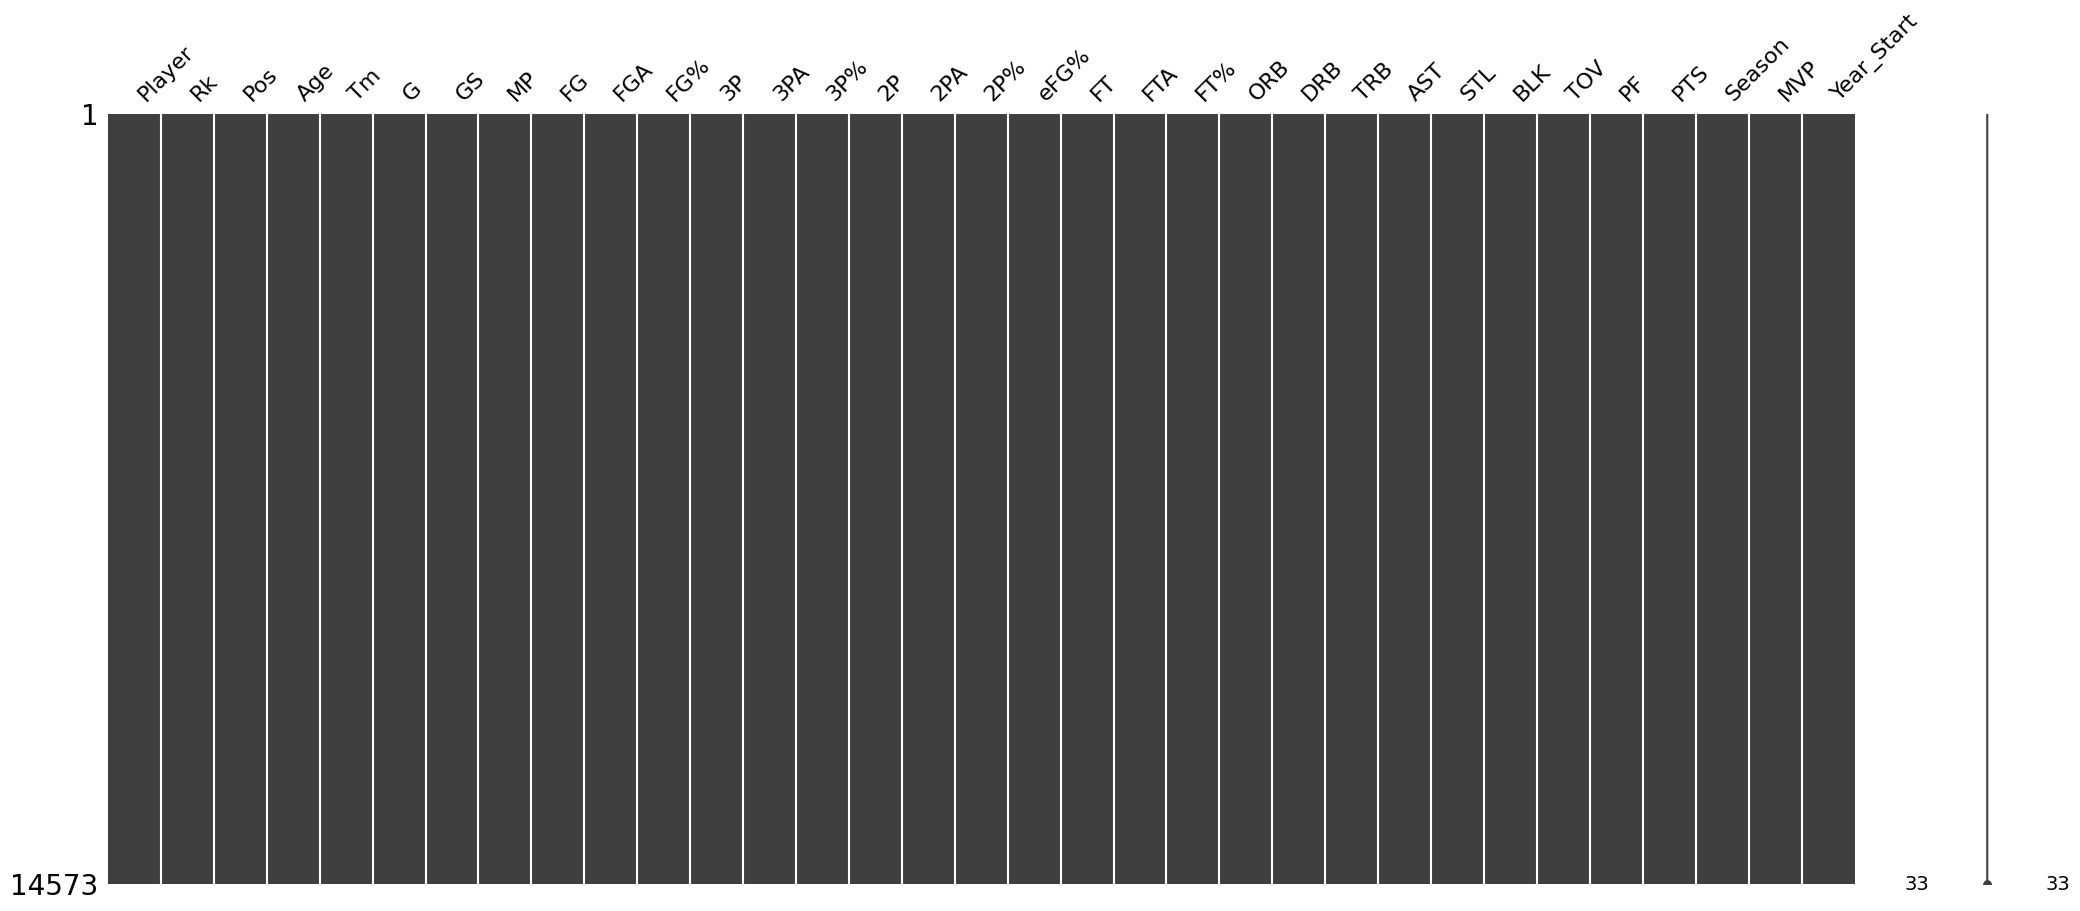

In [ ]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(nbaSemMissings)

In [ ]:
# verificando novamente nulls no dataset
nbaSemMissings.isnull().sum()

Player        0
Rk            0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Season        0
MVP           0
Year_Start    0
dtype: int64

Agora que os nulos foram substituidos, podemos passar para o processo final de transformação.

In [ ]:
# Removendo colunas não importantes
colunas_remover = ['Pos', 'Age', 'Tm', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'PF']
nbaSemMissings = nbaSemMissings.drop(columns=colunas_remover)

# Corrigindo a coluna 'Season'
nbaSemMissings['Season'] = nbaSemMissings['Season'].str[:-3]



#5. Normalização

In [ ]:
# Separar colunas numéricas e categóricas
colunas_numericas = ['Rk', 'G', 'GS', 'MP', 'FG', 'TOV', 'FGA', 'FG%', '3P', '3PA', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'AST', 'PTS', 'Year_Start', 'Season']
colunas_categoricas = ['Player', 'MVP']


In [ ]:
# Separação em bases de treino e teste (holdout)
X = nbaSemMissings[colunas_numericas + colunas_categoricas[:-1]] # Atributos
y = nbaSemMissings['MVP'] # Classe (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalização das colunas numéricas
scaler = StandardScaler()
X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])
X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

# Inicializando o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Aplicar OneHotEncoder para as colunas categóricas
X_train_encoded = encoder.fit_transform(X_train[colunas_categoricas[:-1]])
X_test_encoded = encoder.transform(X_test[colunas_categoricas[:-1]])

# Converter de volta para DataFrame para facilitar a manipulação posterior
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), index=X_test.index)

# Concatenar com as colunas numéricas já normalizadas
X_train_prepared = pd.concat([X_train[colunas_numericas], X_train_encoded_df], axis=1)
X_test_prepared = pd.concat([X_test[colunas_numericas], X_test_encoded_df], axis=1)




Para evitar data leaking e um melhor rendimento do modelo.
Foi feita a escolha da separação dos dados e a aplicação de OneHotEncoder e StandardScaler para a normalização dos dados de treino. Já para os dados saída, como a coluna TARGET MVP é uma informação com informações de verdadeiro ou falso, não é necessária esta normalização, dado a natureza do problema ser voltado para classificação.

# 6. Classificação

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colunas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas[:-1])
    ])

# Criar um pipeline que primeiro transforma os dados e depois aplica o RFE
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rfe', RFE(estimator=LogisticRegression(max_iter=200), n_features_to_select=10))
])

# Validação cruzada
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("Scores em cada fold:", scores)
print("Média dos scores:", scores.mean())



Scores em cada fold: [0.99828473 0.99725557 0.99828473 0.99828415 0.9975978 ]
Média dos scores: 0.9979413984184706


Junto a criação e utilização do Pipeline para o treinamento, também é utilizado o RFE para a seleção das caracteristicas mais importantes para o funcionamento do modelo e a validação cruzada para entender a acuracia de cada fold.


In [ ]:
# Treinamento do pipeline
pipeline.fit(X_train, y_train)

# Extraindo informações sobre os atributos selecionados pelo RFE
support = pipeline.named_steps['rfe'].support_
ranking = pipeline.named_steps['rfe'].ranking_
print("\nAtributos Selecionados: %s" % support)
print("\nRanking de atributos: %s" % ranking)



Atributos Selecionados: [False False  True ... False False False]

Ranking de atributos: [  25   14    1 ... 1141  959 1260]


In [ ]:
 # Predições no conjunto de teste
y_pred = pipeline.predict(X_test)

# Calculando métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)


Acurácia: 0.9981701738334858
Matriz de Confusão:
 [[4364    2]
 [   6    0]]


A matriz de confusão mostra o número de:
Verdadeiros Negativos (TN): 4364 - O modelo previu corretamente que esses não eram MVPs.
Falsos Positivos (FP): 2 - O modelo errou ao prever que esses jogadores eram MVPs.
Falsos Negativos (FN): 6 - O modelo errou ao não reconhecer esses verdadeiros MVPs.
Verdadeiros Positivos (TP): 0 - O modelo não conseguiu identificar corretamente nenhum MVP real.


# Conclusão

Após diversas tentativas e utilização de alguns dos modelos aprendidos durante a sprint, a maior acuracia encontrada foi na tentativa atual, onde o dataset foi normalizado e preparado, evitando datas leaks em todos os passos feitos.

Nas tentativas anteriores, sem o uso de todos os processos atuais, mesmo a acuracia sendo extremamente alta nos conjuntos de treino, isso não era refletivo no teste, dando diversos indicios de overfitting.

Os resultados indicam que, embora a acurácia seja muito alta, isso se deve em grande parte à capacidade do modelo de prever corretamente a maioria esmagadora dos jogadores que não são MVPs, o que é típico em conjuntos de dados altamente desbalanceados. No entanto, o modelo falha em identificar os MVPs (como indicado pela ausência de verdadeiros positivos).

O dataset tem muitos mais exemplos de não-MVPs do que de MVPs, o que pode estar influenciando o desempenho do modelo.
Considerar outros modelos que podem ser mais sensíveis às classes minoritárias pode ser uma solução possivel, além do enriquecimento historico antecessor ao periodo carregado no dataset atual.

